In [22]:
# importing libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# tells the IPython kernel to display plots in the output cells of the notebook
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, fbeta_score

In [23]:
dataframe = pd.read_csv("diabetes.csv")
df = dataframe.copy()
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
print("The columns are:",df.columns)
print("The shape of the dataframe is:", df.shape)

The columns are: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
The shape of the dataframe is: (768, 9)


In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
for column in df.columns:
    print(column,"has", df[column].nunique(), " number of unique categories.")

Pregnancies has 17  number of unique categories.
Glucose has 136  number of unique categories.
BloodPressure has 47  number of unique categories.
SkinThickness has 51  number of unique categories.
Insulin has 186  number of unique categories.
BMI has 248  number of unique categories.
DiabetesPedigreeFunction has 517  number of unique categories.
Age has 52  number of unique categories.
Outcome has 2  number of unique categories.


### Observations:
- There are no null values in any of the columns
- There are significant differences between the mean and median of insulin indicating that there might be many outliers
- Is the blood pressure systolic or diastolic?
- Average BMI is also between overweight and obese.

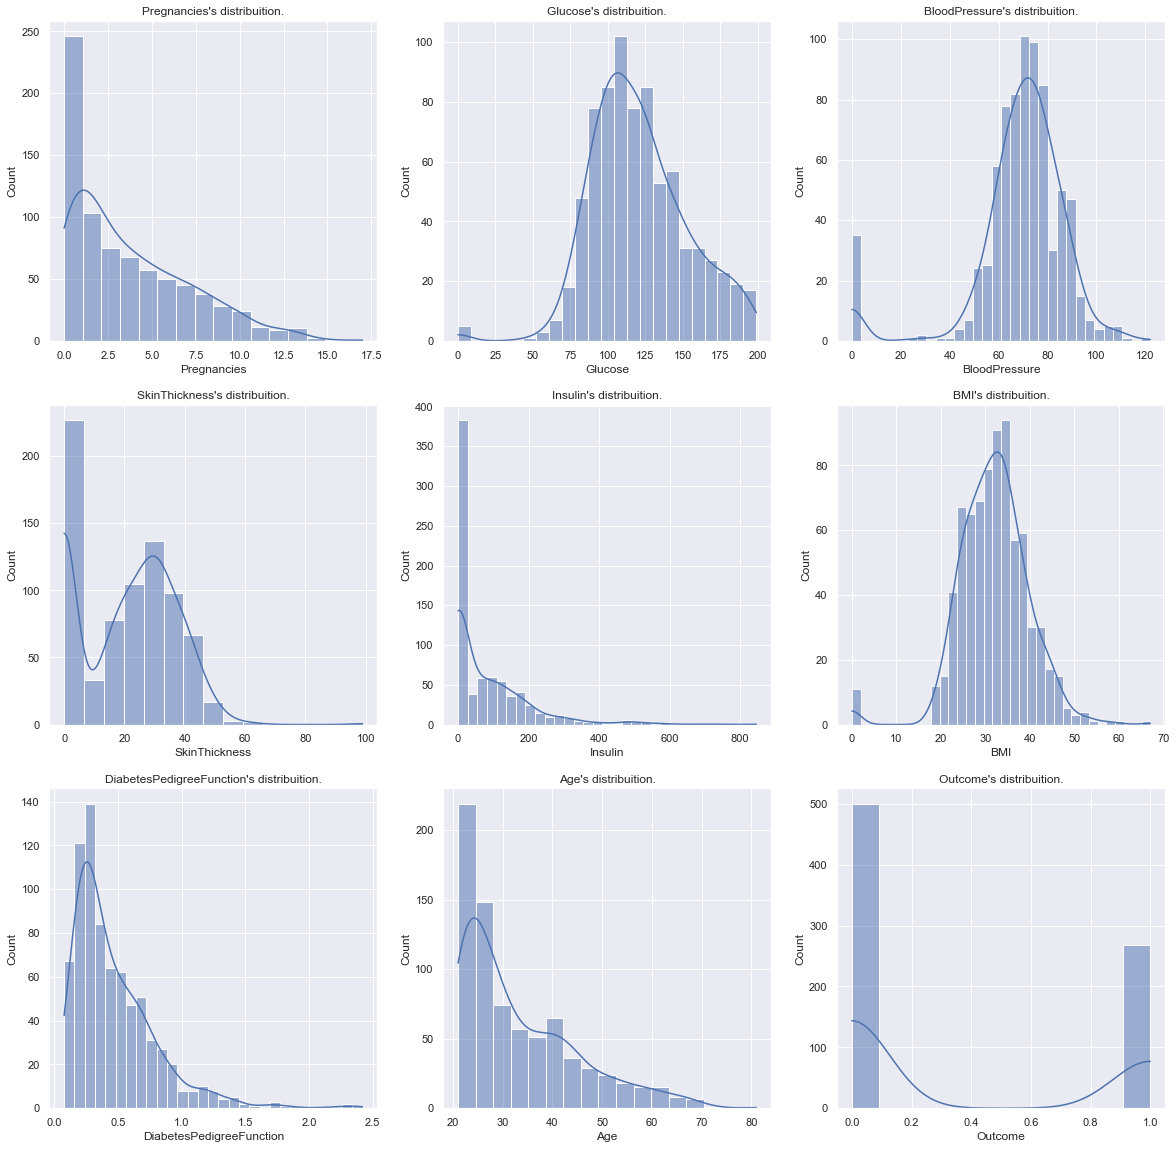

In [28]:
plt.figure(figsize=(20,20))# size of the entire output
for tups in enumerate(df.columns):
    plt.subplot(3, 3, tups[0]+1)# 3 * 3 boxes; tup[0] are the indexes
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=df, x=tups[1], kde=True) # here we use kernel destiny estimation for smoothing the histplots
    plt.title("{}'s distribuition.".format(tups[1]))

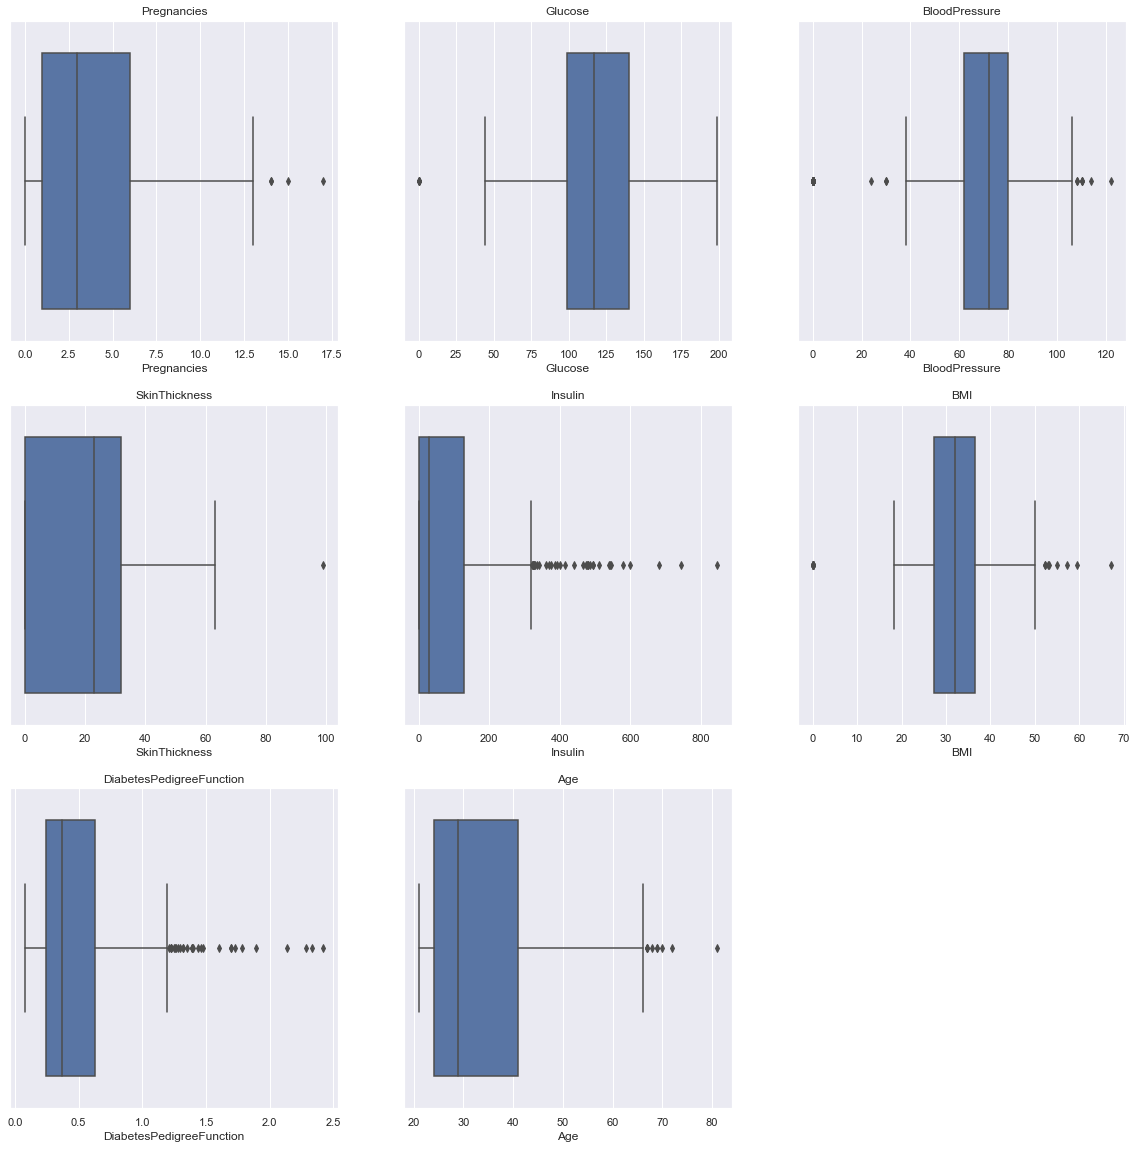

In [29]:
independent_feature = [column for column in df.columns if column not in ['Outcome']]
plt.figure(figsize=(20,20))
for tups in enumerate(independent_feature):
    plt.subplot(3, 3, tups[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=df, x=tups[1])
    plt.title("{}".format(tups[1]))

In [30]:
def outlier_trimmer(data_set, feature, trimming_value, pos = 'upper'):
    threshold=data_set[feature].quantile(trimming_value/100)
    if pos == 'lower':
        data_set=data_set[data_set[feature]>threshold]
    else:
        data_set=data_set[data_set[feature]<threshold]
    return data_set

In [31]:
for column in ['BloodPressure','SkinThickness','BMI','Age']:
    df = outlier_trimmer(df, column, 99)
print("Shape of dataframe after trimming BloodPressure, SkinThickness, BMI and age is: ",df.shape)
    
for column in ['Insulin','DiabetesPedigreeFunction']:
    df = outlier_trimmer(df, column, 97)
print("Shape of dataframe after trimming Insulin and DiabetesPedigreeFunction is: ",df.shape)
 
for column in ['BMI','Glucose', 'BloodPressure']:
    df = outlier_trimmer(df, column, 0.5, 'lower')
print("Shape of dataframe after trimming BloodPressure, Glucose and BMI is: ",df.shape)

Shape of dataframe after trimming BloodPressure, SkinThickness, BMI and age is:  (733, 9)
Shape of dataframe after trimming Insulin and DiabetesPedigreeFunction is:  (689, 9)
Shape of dataframe after trimming BloodPressure, Glucose and BMI is:  (649, 9)


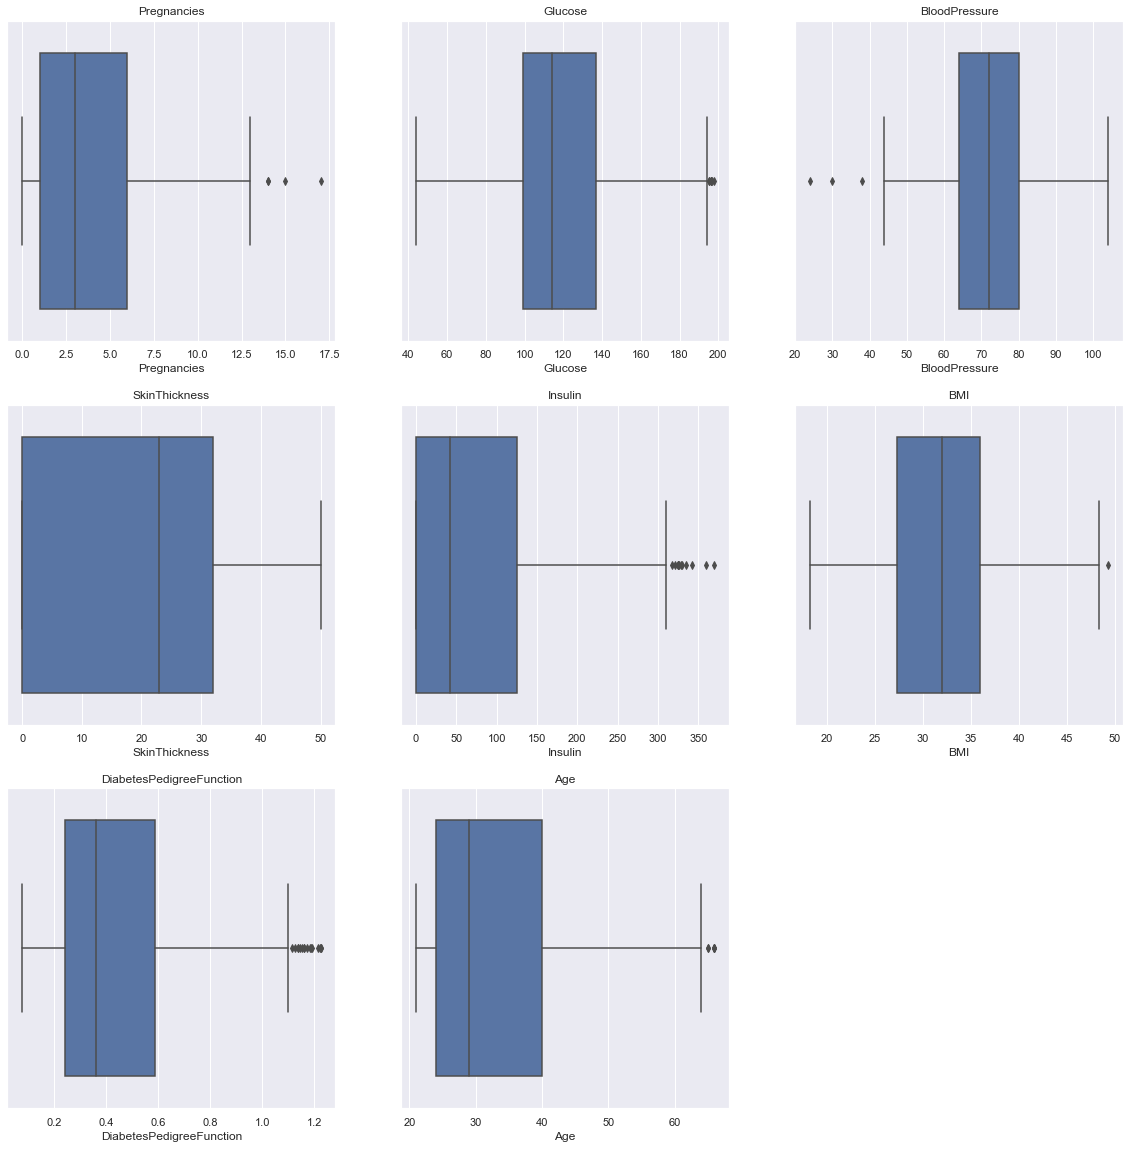

In [32]:
plt.figure(figsize=(20,20))
for tups in enumerate(independent_feature):
    plt.subplot(3, 3, tups[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=df, x=tups[1])
    plt.title("{}".format(tups[1]))

0    500
1    268
Name: Outcome, dtype: int64

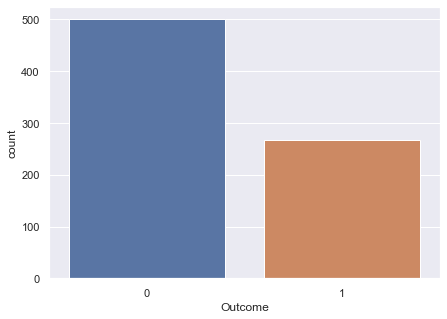

In [33]:
sns.countplot(data=dataframe, x='Outcome')
dataframe['Outcome'].value_counts()

0    439
1    210
Name: Outcome, dtype: int64

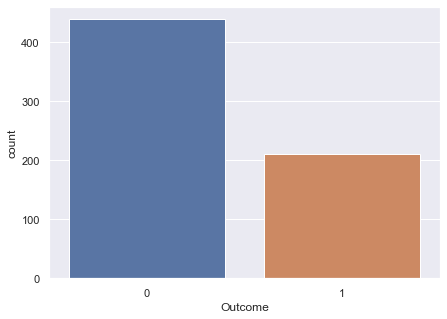

In [34]:
sns.countplot(data=df, x='Outcome')
df['Outcome'].value_counts()

### Observation: 
- Data is extremely unbalanced even after removing outliers

In [35]:
### Needs to be changed
# plt.figure(figsize=(20,20))
# for tups in enumerate(independent_feature):
#     plt.subplot(3, 3, tups[0]+1)
#     sns.set(rc={'figure.figsize':(8,10)})
#     sns.regplot(x=df[tups[1]], y=df['Outcome'])
#     plt.xlabel(tups[1])
#     plt.ylabel("Outcome")
#     plt.title("{} Vs Outcome".format(tups[1]))

<AxesSubplot:>

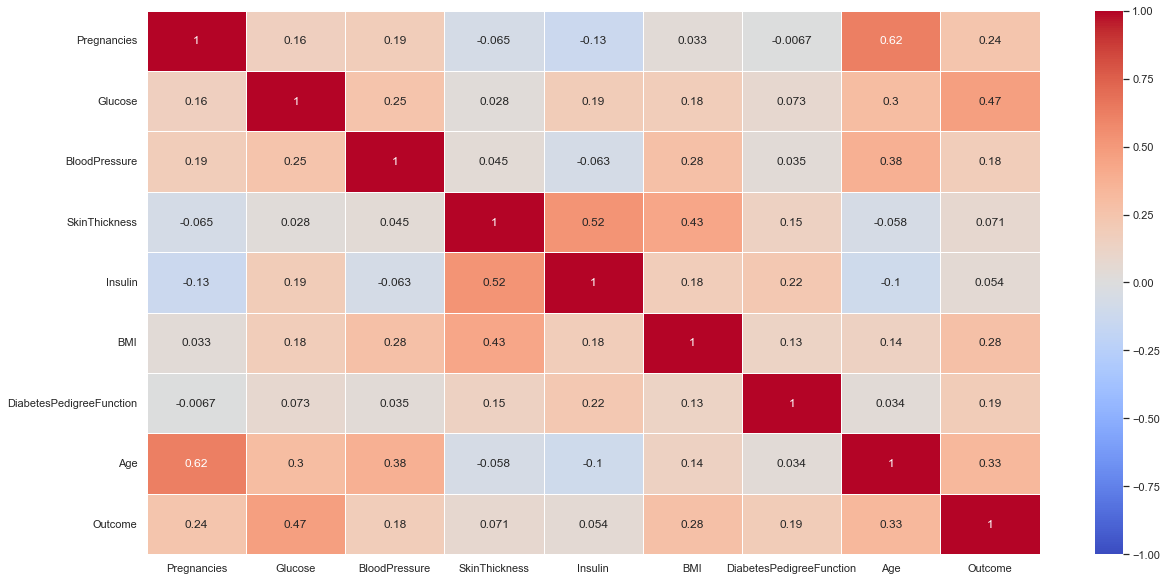

In [36]:
### Plotting heatmap for visualising the correlation between features
corr =  df.corr(method='spearman')
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data=corr, annot=True, linewidths=0.5, cmap="coolwarm", vmin=-1, vmax=1)

## Splitting and Standarizing

In [37]:
# splitting the features and outcome
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
# splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print("The shape of training data: ", X_train.shape, y_train.shape)
print("The shape of test data: ", X_test.shape, y_test.shape)

The shape of training data:  (486, 8) (486,)
The shape of test data:  (163, 8) (163,)


In [38]:
### Crating a standard scaler object
scaler=StandardScaler()
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)

## Logistic regression

In [39]:
# Creating a Logistic regression object
logistic_reg=LogisticRegression()
# Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)
# Using model to predict outcome
y_pred=logistic_reg.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [40]:
confusion_mat=confusion_matrix(y_test, y_pred)
accuracy=round(accuracy_score(y_test, y_pred)*100,4)
print("The confusion matrix is: \n", confusion_mat)
print("The classification report is: \n", classification_report(y_test,y_pred))
print("Accuracy of logistic regression is: ", accuracy)

The confusion matrix is: 
 [[103   9]
 [ 20  31]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       112
           1       0.78      0.61      0.68        51

    accuracy                           0.82       163
   macro avg       0.81      0.76      0.78       163
weighted avg       0.82      0.82      0.82       163

Accuracy of logistic regression is:  82.2086


## Decision trees classification

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [41]:
# build model
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train, y_train)

[Text(0.5, 0.875, 'Glucose <= 1.221\ngini = 0.44\nsamples = 486\nvalue = [327, 159]\nclass = No Disease'),
 Text(0.25, 0.625, 'Age <= -0.394\ngini = 0.374\nsamples = 421\nvalue = [316, 105]\nclass = No Disease'),
 Text(0.125, 0.375, 'BMI <= -0.17\ngini = 0.187\nsamples = 220\nvalue = [197, 23]\nclass = No Disease'),
 Text(0.0625, 0.125, 'gini = 0.069\nsamples = 111\nvalue = [107, 4]\nclass = No Disease'),
 Text(0.1875, 0.125, 'gini = 0.288\nsamples = 109\nvalue = [90, 19]\nclass = No Disease'),
 Text(0.375, 0.375, 'BMI <= -0.773\ngini = 0.483\nsamples = 201\nvalue = [119, 82]\nclass = No Disease'),
 Text(0.3125, 0.125, 'gini = 0.149\nsamples = 37\nvalue = [34, 3]\nclass = No Disease'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 164\nvalue = [85, 79]\nclass = No Disease'),
 Text(0.75, 0.625, 'DiabetesPedigreeFunction <= -0.544\ngini = 0.281\nsamples = 65\nvalue = [11, 54]\nclass = Disease'),
 Text(0.625, 0.375, 'BMI <= -0.524\ngini = 0.48\nsamples = 20\nvalue = [8, 12]\nclass = Disea

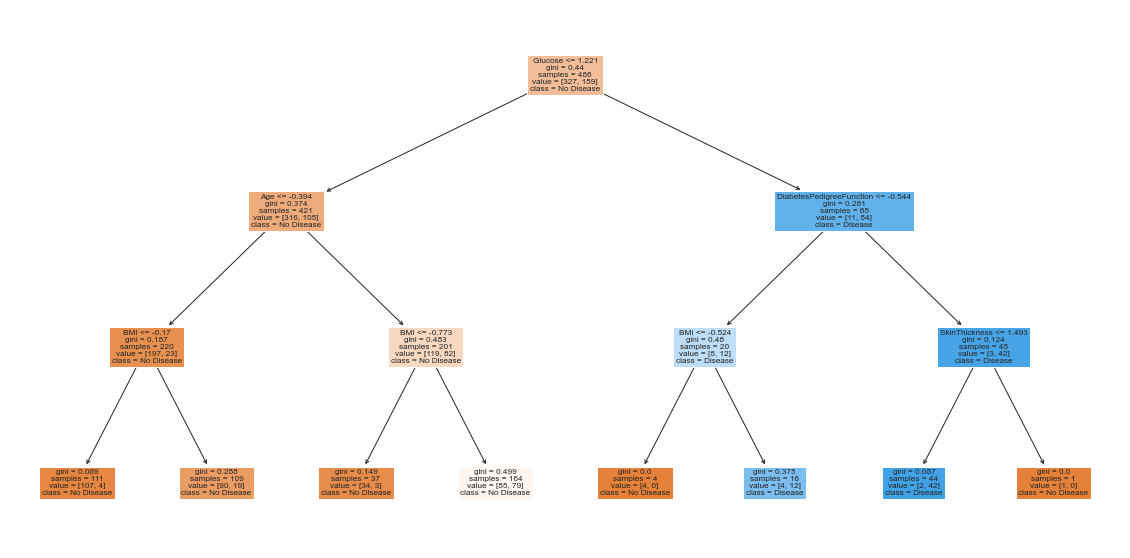

In [42]:
plt.figure(figsize=(20,10))
# tree.plot_tree(classifier, filled=True)
tree.plot_tree(classifier,feature_names=X.columns,class_names=['No Disease', "Disease"], filled=True)

In [43]:
# predict
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [44]:
confusion_mat=confusion_matrix(y_test, y_pred)
print("The confusion matrix is: \n", confusion_mat)
print("Accuracy of decision tree model is: ", round(metrics.accuracy_score(y_test,y_pred)*100, 4))
print("The classification report is: \n", classification_report(y_test,y_pred))

The confusion matrix is: 
 [[109   3]
 [ 36  15]]
Accuracy of decision tree model is:  76.0736
The classification report is: 
               precision    recall  f1-score   support

           0       0.75      0.97      0.85       112
           1       0.83      0.29      0.43        51

    accuracy                           0.76       163
   macro avg       0.79      0.63      0.64       163
weighted avg       0.78      0.76      0.72       163



### Hyper-parameter tuning:

In [45]:
classifier = DecisionTreeClassifier()
# Create the parameter grid based on the results of random search 
params = [
    {'max_depth': [2, 3, 5, 10, 20]},
    {'min_samples_leaf': [5, 10, 20, 50, 100]},
    {'criterion': ["gini", "entropy"]}
]
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Text(0.5, 0.8333333333333334, 'Glucose <= 1.221\ngini = 0.44\nsamples = 486\nvalue = [327, 159]\nclass = No Disease'),
 Text(0.25, 0.5, 'Age <= -0.394\ngini = 0.374\nsamples = 421\nvalue = [316, 105]\nclass = No Disease'),
 Text(0.125, 0.16666666666666666, 'gini = 0.187\nsamples = 220\nvalue = [197, 23]\nclass = No Disease'),
 Text(0.375, 0.16666666666666666, 'gini = 0.483\nsamples = 201\nvalue = [119, 82]\nclass = No Disease'),
 Text(0.75, 0.5, 'DiabetesPedigreeFunction <= -0.544\ngini = 0.281\nsamples = 65\nvalue = [11, 54]\nclass = Disease'),
 Text(0.625, 0.16666666666666666, 'gini = 0.48\nsamples = 20\nvalue = [8, 12]\nclass = Disease'),
 Text(0.875, 0.16666666666666666, 'gini = 0.124\nsamples = 45\nvalue = [3, 42]\nclass = Disease')]

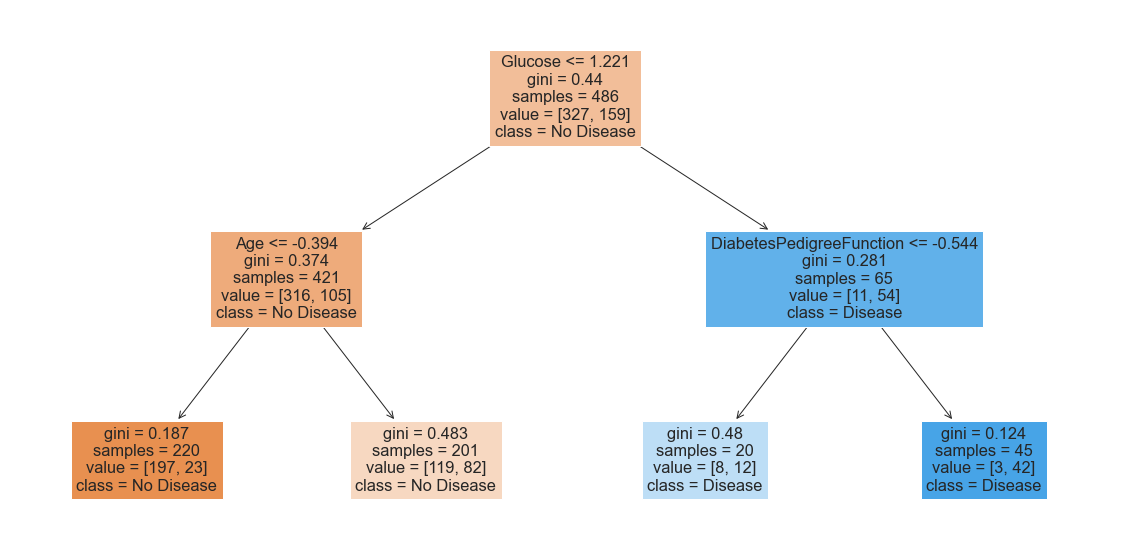

In [54]:
grid_search.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(grid_search.best_estimator_, feature_names=X.columns,class_names=['No Disease', "Disease"], filled=True)

In [53]:
print("The best params is:",grid_search.best_params_)
print("The best score is:",grid_search.best_score_)

The best params is: {'max_depth': 2}
The best score is: 0.7469516325701124


In [27]:
y_pred=grid_search.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
confusion_mat=confusion_matrix(y_test, y_pred)
print("The confusion matrix is: \n", confusion_mat)
print("The classification report is: \n", classification_report(y_test,y_pred))
print("Accuracy of decision tree model is: ", round(metrics.accuracy_score(y_test,y_pred)*100, 2))

The confusion matrix is: 
 [[108   4]
 [ 32  19]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.77      0.96      0.86       112
           1       0.83      0.37      0.51        51

    accuracy                           0.78       163
   macro avg       0.80      0.67      0.69       163
weighted avg       0.79      0.78      0.75       163

Accuracy of decision tree model is:  77.91


## KNN Classifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [30]:
confusion_mat=confusion_matrix(y_test, y_pred)
print("The confusion matrix is: \n", confusion_mat)
print("The classification report is: \n", classification_report(y_test,y_pred))
print("Accuracy of KNN model is: ", round(metrics.accuracy_score(y_test,y_pred)*100, 2))

The confusion matrix is: 
 [[99 13]
 [27 24]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       112
           1       0.65      0.47      0.55        51

    accuracy                           0.75       163
   macro avg       0.72      0.68      0.69       163
weighted avg       0.74      0.75      0.74       163

Accuracy of KNN model is:  75.46


## Naive Bayes

In [31]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

confusion_mat=confusion_matrix(y_test, y_pred)
print("The confusion matrix is: \n", confusion_mat)
print("The classification report is: \n", classification_report(y_test,y_pred))
print("Accuracy of KNN model is: ", round(metrics.accuracy_score(y_test,y_pred)*100, 2))

The confusion matrix is: 
 [[90 22]
 [22 29]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       112
           1       0.57      0.57      0.57        51

    accuracy                           0.73       163
   macro avg       0.69      0.69      0.69       163
weighted avg       0.73      0.73      0.73       163

Accuracy of KNN model is:  73.01
